## Ball model extracted from Cell

#### (new SomaOnly child class of the Cell class) 

In [1]:
import os
os.chdir('../../')

In [2]:
import numpy as np
import pandas as pd
from neuron import h
from neurostim.cell import Cell
from neurostim.simulation import SimControl
from neurostim.stimulator import Stimulator
from neurostim.utils import convert_polar_to_cartesian_xz
from neurostim.analysis import get_AP_times
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [3]:
class SomaOnly(Cell):
    name = 'SomaOnlyModel'

    def __init__(
        self,
        gid=0,
        hoc_file="simneurostim/model/hoc/L5.hoc",
        cortical_depth={'L23': 400, 'L5': 1170},
        ChR_soma_density=13e9,
        ChR_distribution="uniform",
        rm_mech_from_secs=None,
        scale=1,
    ):
        super().__init__(hoc_file, cortical_depth, ChR_soma_density, ChR_distribution, rm_mech_from_secs)

        self._gid = gid
        self._strip_redundant_morphology()
        self._strip_child_relations()
        self._strip_redundant_coords()

        self._scale_size_L(scale)

    
    def _strip_redundant_morphology(self):
        assert (h.soma in h.allsec()), "Soma not found."
        
        for sec in h.allsec():
            if sec.name() != "soma":
                h.delete_section(sec=sec)
            else:
                self.soma = sec

    def _strip_child_relations(self):
        self.soma_child_relations = None

    def _strip_redundant_coords(self):
        self.segs_coord = self.segs_coord["soma"]
    
    def _setup_morphology(self): # unused
        h.finitialize()
        pass

    def _setup_biophysics(self): # unused 
        h.finitialize()
        pass

    def _scale_size_L(self, scale):
        for seg in self.soma:
            print(f"BEFORE: cm:{seg.cm}, area:{seg.area()}, volume:{seg.volume()}, sizeof:{seg.__sizeof__()}, diam:{seg.diam}")
        print()
        
        self.soma.L *= scale
        
        for seg in self.soma:
            print(f"AFTER: cm:{seg.cm}, area:{seg.area()}, volume:{seg.volume()}, sizeof:{seg.__sizeof__()}, diam:{seg.diam}")
        
        #h.finitialize() does not let me

    def _scale_size_diams(self, scale): # unused
        for seg in self.soma:
            print(f"BEFORE: cm:{seg.cm}, area:{seg.area()}, volume:{seg.volume()}, sizeof:{seg.__sizeof__()}, diam:{seg.diam}")
            seg.diam *= scale
            print(f"AFTER: cm:{seg.cm}, area:{seg.area()}, volume:{seg.volume()}, sizeof:{seg.__sizeof__()}, diam:{seg.diam}\n")

        #h.finitialize() does not let me
    
    def change_biophysics(self, changes): # {'g_pas': 0.000033, 'gbar_na': 0.12, ..}
        for property_name, value in changes.items():
            for seg in self.soma:
                try:
                    setattr(seg, property_name, value)
                except AttributeError:
                    print(f"Property {property_name} not found in segment in the soma section.")
        
        h.finitialize()

    def change_property_scale(self, property_name, scalar):
        for seg in self.soma:
            try:
                prev = getattr(seg, property_name)
                setattr(seg, property_name, prev*scalar)
            except AttributeError:
                print(f"Property {property_name} not found in segment in the soma section.")
        
        h.finitialize()

    def _find_section_by_name(self, sec_name): # unused
        for sec in h.allsec():
            if sec.name() == sec_name:
                return sec
        return None

    
    def plot_soma(self):
        fig, ax = plt.subplots()
        collection = self.plot_foutz2012(
             func=lambda x:1, axes='xz',scaling = 1, segfunc=False, clim=None,cmap=None,color='black', shift_x=0)
        ax.add_collection(collection)
        ax.axis('equal')

In [4]:
h.load_file("stdrun.hoc")
h.cvode_active(1)

1.0

In [5]:
L5soma = SomaOnly(0, scale=2) # cant create more instances because in cell.py 'h.' is used instead of object's parameters
# L5somaChanged = SomaOnly(1)

	1 
	1 
	1 
	1 
BEFORE: cm:1.0, area:86.14836104765763, volume:154.4043701854171, sizeof:32, diam:8.0625
BEFORE: cm:1.0, area:131.82019906628219, volume:332.32749130241575, sizeof:32, diam:11.825000047683716
BEFORE: cm:1.0, area:153.47246345475108, volume:528.7879904499684, sizeof:32, diam:14.96250033378601
BEFORE: cm:1.0, area:166.89712162041369, volume:683.5163402989418, sizeof:32, diam:17.02500033378601
BEFORE: cm:1.0, area:177.40338781091344, volume:802.3392058340972, sizeof:32, diam:18.450000047683716
BEFORE: cm:1.0, area:183.85635262132297, volume:884.554681526376, sizeof:32, diam:19.375
BEFORE: cm:1.0, area:186.2701736425645, volume:873.3627576979625, sizeof:32, diam:19.25
BEFORE: cm:1.0, area:185.86800633441408, volume:698.1944235677253, sizeof:32, diam:17.1875
BEFORE: cm:1.0, area:155.27944801072528, volume:398.8104611576605, sizeof:32, diam:12.9375
BEFORE: cm:1.0, area:94.4400525410541, volume:176.81276153485052, sizeof:32, diam:8.625

AFTER: cm:1.0, area:157.50221494790128, 

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/root/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:501: RuntimeWarning: invalid value encountered in divide
  a = (data - clim[0])/(clim[1]-clim[0])


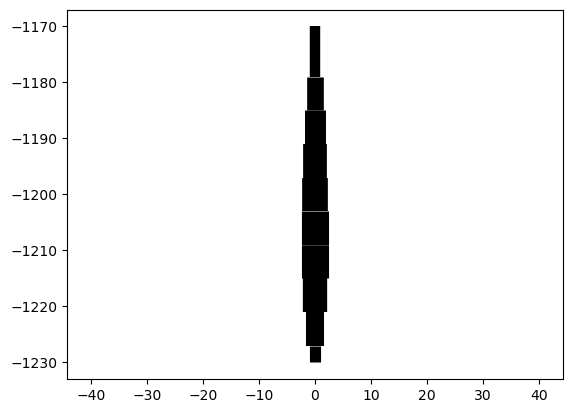

In [6]:
L5soma.plot_soma()

In [7]:
h.topology()


|----------|       soma(0-1)



1.0

In [8]:
list(L5soma.soma)

[soma(0.05),
 soma(0.15),
 soma(0.25),
 soma(0.35),
 soma(0.45),
 soma(0.55),
 soma(0.65),
 soma(0.75),
 soma(0.85),
 soma(0.95)]

In [9]:
L5soma.soma_child_relations

In [10]:
h.soma.children()

[]

In [11]:
L5soma.segs_coord

[[0.0, 0.0, -1170.0],
 [3.3306690738754696e-16, 0.0, -1171.5],
 [9.992007221626409e-16, 0.0, -1174.5],
 [1.6653345369377348e-15, 0.0, -1177.5],
 [2.3314683517128287e-15, 0.0, -1180.5],
 [2.9976021664879227e-15, 0.0, -1183.5],
 [3.6637359812630166e-15, 0.0, -1186.5],
 [4.3298697960381105e-15, 0.0, -1189.5],
 [4.9960036108132044e-15, 0.0, -1192.5],
 [5.662137425588298e-15, 0.0, -1195.5],
 [6.328271240363392e-15, 0.0, -1198.5],
 [6.661338147750939e-15, 0.0, -1200.0]]

In [12]:
gbars = {}
for seg in L5soma.soma:
    gbars[str(seg)] = (seg.gbar_na, seg.gbar_kv)

print(gbars)

{'soma(0.05)': (256.752, 64.188), 'soma(0.15)': (256.752, 64.188), 'soma(0.25)': (256.752, 64.188), 'soma(0.35)': (256.752, 64.188), 'soma(0.45)': (256.752, 64.188), 'soma(0.55)': (256.752, 64.188), 'soma(0.65)': (256.752, 64.188), 'soma(0.75)': (256.752, 64.188), 'soma(0.85)': (256.752, 64.188), 'soma(0.95)': (256.752, 64.188)}


In [13]:
stimulator = Stimulator(
    diameter_um=200, 
    NA=0.22
)

simcontrol = SimControl(
    cell=L5soma,
    stimulator=stimulator
)

sim_data = simcontrol.run(
    temp_protocol=dict(
        duration_ms=200,
        delay_ms=10,
        total_rec_time_ms=230,
    ),
    stim_location=(0, 0, 0),
    stim_intensity_mWPERmm2=100,
    rec_vars=(
        ['time [ms]', 'V_soma(0.5)'],
        ['h._ref_t', 'h.soma(0.5)._ref_v'],
    ),
    interpol_dt_ms=0.1,
)

In [28]:
sim_data[sim_data['time [ms]'] >= 50]

,time [ms],V_soma(0.5)
500,50.0,-38.958039
501,50.1,-40.892733
502,50.2,-42.619605
503,50.3,-44.152961
504,50.4,-45.508682
...,...,...
2295,229.5,-63.524720
2296,229.6,-63.573918
2297,229.7,-63.623115
2298,229.8,-63.672313


<Axes: xlabel='time [ms]'>

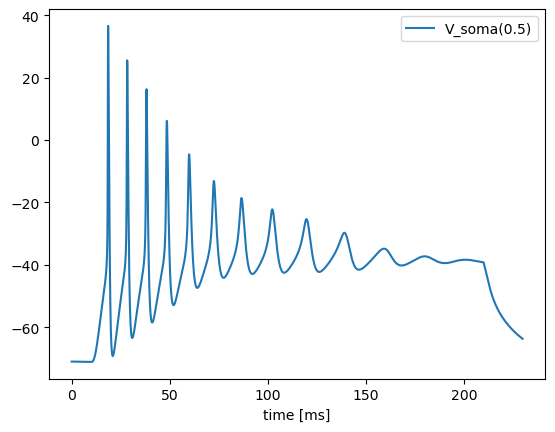

In [15]:
sim_data.plot("time [ms]","V_soma(0.5)")

In [16]:
L5soma.change_biophysics({'gbar_na': 100.5})

In [17]:
mechs = h.soma.psection()['density_mechs']

print(mechs.keys())
print(mechs['na12'])

for key, val in mechs.items():
    print(key)

dict_keys(['pas', 'ca', 'cad', 'chanrhod', 'kca', 'km', 'kv', 'na', 'na12', 'na16'])
{'gbar': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'gna': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'minf': [0.008806476994711035, 0.008806474114313963, 0.008806471024921015, 0.008806467821504467, 0.008806464622998184, 0.008806461610405759, 0.008806458886242449, 0.008806456376558533, 0.008806453857784936, 0.008806451347687533], 'hinf': [0.748385642262903, 0.7483857114954233, 0.7483857857513174, 0.7483858627478549, 0.7483859396263705, 0.748386012036306, 0.7483860775136297, 0.7483861378357791, 0.748386198376406, 0.7483862587084938], 'mtau': [0.0692251216735887, 0.06922511762468236, 0.06922511328199546, 0.06922510877902825, 0.0692251042829633, 0.06922510004823307, 0.06922509621894087, 0.06922509269113729, 0.06922508915055656, 0.06922508562217175], 'htau': [4.656676671054613, 4.656675827072724, 4.656674921853189, 4.656673983223728, 4.656673046033018, 4.656672163316717, 4.656671365112706

In [18]:
L5soma.soma(0.5).gbar_na

100.5

## Check size doubling

In [19]:
import pprint

def check_size_properties():
    diams = {}
    for seg in L5soma.soma:
        diams[str(seg)] = seg.diam
    
    pprint.pprint(diams)

    segsdiams = [L5soma.soma.diam3d(i) for i in range(len(list(L5soma.soma.allseg())))]
    diams3d = {}
    for i in range(len(segsdiams)):
        diams3d[i] = segsdiams[i]
        
    pprint.pprint(diams3d)
    print(f"soma.__sizeof__() = {L5soma.soma.__sizeof__()}")
    print(f"soma.L = {L5soma.soma.L}")
    print(f"soma.Ra = {L5soma.soma.Ra}")

In [20]:
check_size_properties()

{'soma(0.05)': 8.0625,
 'soma(0.15)': 11.825000047683716,
 'soma(0.25)': 14.96250033378601,
 'soma(0.35)': 17.02500033378601,
 'soma(0.45)': 18.450000047683716,
 'soma(0.55)': 19.375,
 'soma(0.65)': 19.25,
 'soma(0.75)': 17.1875,
 'soma(0.85)': 12.9375,
 'soma(0.95)': 8.625}
{0: 7.5,
 1: 7.5,
 2: 12.0,
 3: 15.100000381469727,
 4: 17.100000381469727,
 5: 18.5,
 6: 19.5,
 7: 19.5,
 8: 17.5,
 9: 13.0,
 10: 8.0,
 11: 8.0}
soma.__sizeof__() = 40
soma.L = 60.0
soma.Ra = 150.0


----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/root/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:501: RuntimeWarning: invalid value encountered in divide
  a = (data - clim[0])/(clim[1]-clim[0])


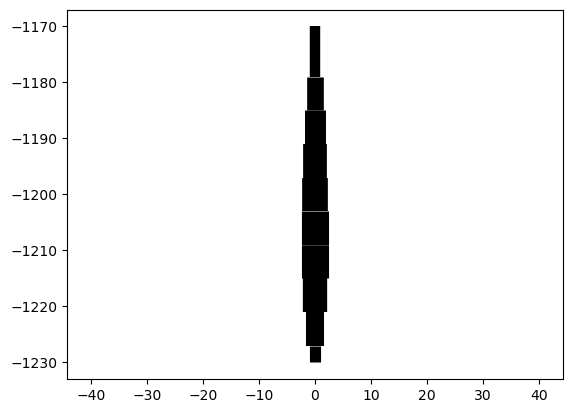

In [21]:
L5soma.plot_soma()

In [22]:
#L5soma.change_property_scale('diam', 2)
L5soma._scale_size_L(2)

BEFORE: cm:1.0, area:157.50221494790128, volume:308.8087403708342, sizeof:32, diam:8.0625
BEFORE: cm:1.0, area:233.8183554920035, volume:664.6549826048315, sizeof:32, diam:11.825000047683716
BEFORE: cm:1.0, area:288.49680151008573, volume:1057.575980899937, sizeof:32, diam:14.96250033378601
BEFORE: cm:1.0, area:324.18722137066356, volume:1367.0326805978837, sizeof:32, diam:17.02500033378601
BEFORE: cm:1.0, area:349.5470595549287, volume:1604.6784116681945, sizeof:32, diam:18.450000047683716
BEFORE: cm:1.0, area:365.8390108662856, volume:1769.109363052752, sizeof:32, diam:19.375
BEFORE: cm:1.0, area:365.3240099828064, volume:1746.725515395925, sizeof:32, diam:19.25
BEFORE: cm:1.0, area:336.8113603275635, volume:1396.3888471354505, sizeof:32, diam:17.1875
BEFORE: cm:1.0, area:262.14711971056596, volume:797.620922315321, sizeof:32, diam:12.9375
BEFORE: cm:1.0, area:169.8423528346982, volume:353.62552306970105, sizeof:32, diam:8.625

AFTER: cm:1.0, area:306.7822100540298, volume:617.617480

In [23]:
check_size_properties()

{'soma(0.05)': 8.0625,
 'soma(0.15)': 11.825000047683716,
 'soma(0.25)': 14.96250033378601,
 'soma(0.35)': 17.02500033378601,
 'soma(0.45)': 18.450000047683716,
 'soma(0.55)': 19.375,
 'soma(0.65)': 19.25,
 'soma(0.75)': 17.1875,
 'soma(0.85)': 12.9375,
 'soma(0.95)': 8.625}
{0: 7.5,
 1: 7.5,
 2: 12.0,
 3: 15.100000381469727,
 4: 17.100000381469727,
 5: 18.5,
 6: 19.5,
 7: 19.5,
 8: 17.5,
 9: 13.0,
 10: 8.0,
 11: 8.0}
soma.__sizeof__() = 40
soma.L = 120.0
soma.Ra = 150.0


----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


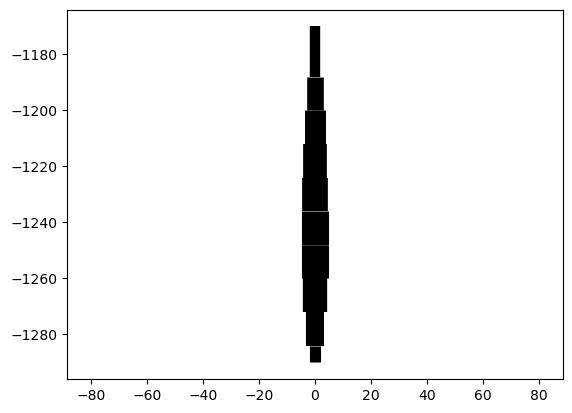

In [24]:
L5soma.plot_soma()

In [25]:
dir([seg for seg in L5soma.soma][0])

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'area',
 'ca',
 'ca_ion',
 'cad',
 'chanrhod',
 'cm',
 'diam',
 'k_ion',
 'kca',
 'km',
 'kv',
 'na',
 'na12',
 'na16',
 'na_ion',
 'node_index',
 'pas',
 'point_processes',
 'ri',
 'sec',
 'v',
 'volume',
 'x']

In [26]:
[seg for seg in L5soma.soma][0].volume()

617.6174807416684

In [27]:
dir(L5soma.soma)

['L',
 'Ra',
 '__call__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'allseg',
 'arc3d',
 'cell',
 'children',
 'connect',
 'diam3d',
 'has_membrane',
 'hname',
 'hoc_internal_name',
 'insert',
 'is_pysec',
 'n3d',
 'name',
 'nseg',
 'orientation',
 'parentseg',
 'psection',
 'pt3dadd',
 'pt3dchange',
 'pt3dclear',
 'pt3dinsert',
 'pt3dremove',
 'pt3dstyle',
 'push',
 'rallbranch',
 'same',
 'spine3d',
 'subtree',
 'trueparentseg',
 'uninsert',
 'wholetree',
 'x3d',
 'y3d',
 'z3d']